In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Pune FinancialHealth2022.csv")

In [3]:
df = df.dropna()

In [4]:
df = df.drop(columns=['Total Profit/ Loss'])

In [5]:
df

,City Name,Year,Municipal's Revenue,Municipal's Expenditure
0,Pune,2020-21,471331,480144
1,Pune,2019-20,444668,446151
2,Pune,2018-19,439106,455144
3,Pune,2017-18,430659,390248
4,Pune,2016-17,372848,408931
5,Pune,2015-16,403733,348443
6,Pune,2014-15,332576,319542


In [6]:
df['net_profit'] = df["Municipal's Revenue"] - df["Municipal's Expenditure"]

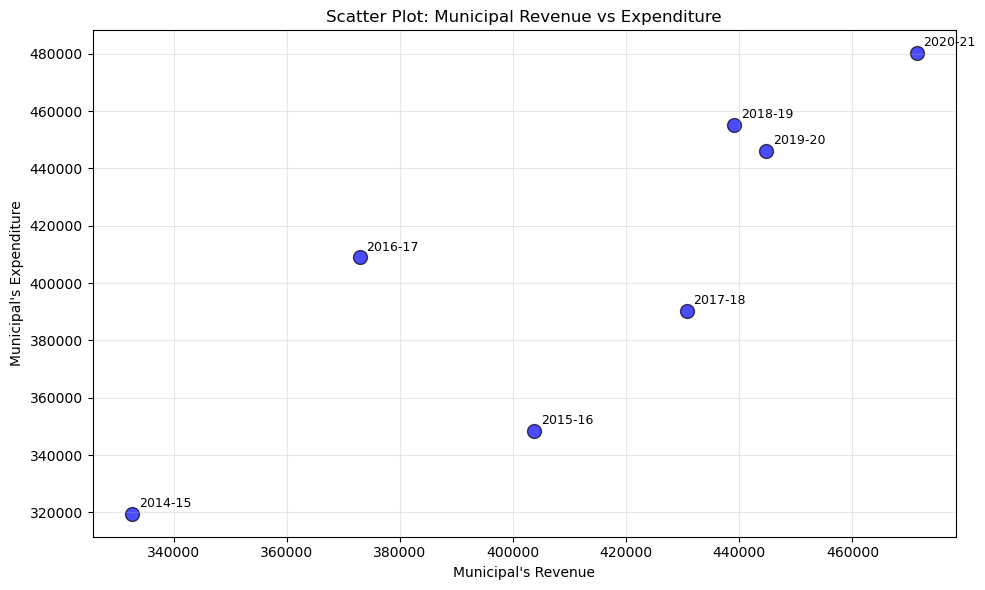

Scatter plot saved as 'plots/scatter_plot.png'


In [7]:
# Create plots directory if it doesn't exist
import os
os.makedirs('plots', exist_ok=True)

# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Scatter Plot: Municipal Revenue vs Expenditure
plt.figure(figsize=(10, 6))
plt.scatter(df["Municipal's Revenue"], df["Municipal's Expenditure"], 
           s=100, alpha=0.7, c='blue', edgecolors='black')
plt.xlabel("Municipal's Revenue")
plt.ylabel("Municipal's Expenditure")
plt.title('Scatter Plot: Municipal Revenue vs Expenditure')
plt.grid(True, alpha=0.3)

# Add year labels to each point
for i, txt in enumerate(df['Year']):
    plt.annotate(txt, (df["Municipal's Revenue"].iloc[i], df["Municipal's Expenditure"].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.savefig('plots/scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Scatter plot saved as 'plots/scatter_plot.png'")

/tmp/ipykernel_130608/3708781292.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)


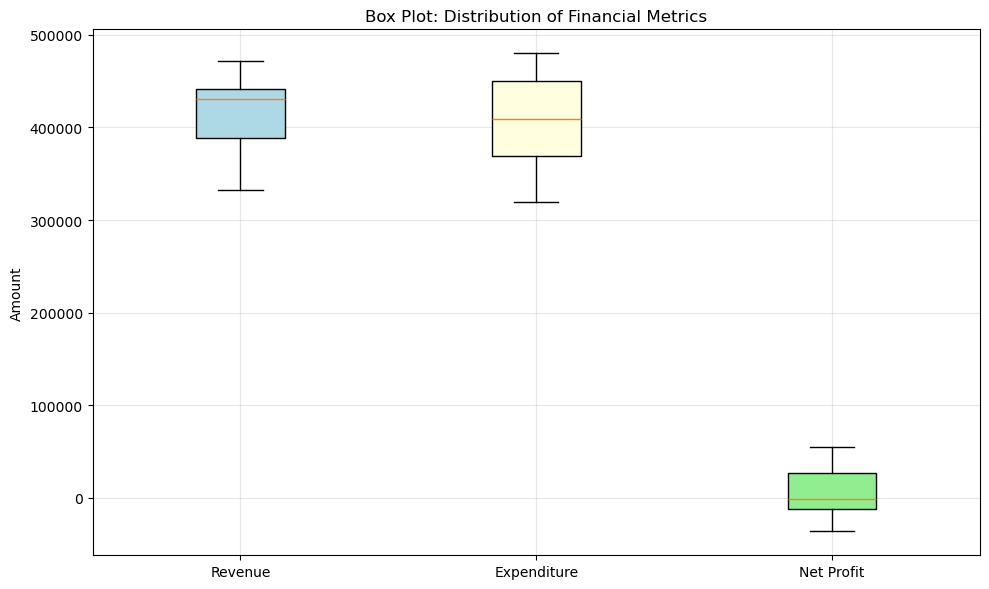

Box plot saved as 'plots/box_plot.png'


In [8]:
# 2. Box Plot: Distribution of Revenue and Expenditure
plt.figure(figsize=(10, 6))

# Prepare data for box plot
data_to_plot = [df["Municipal's Revenue"], df["Municipal's Expenditure"], df["net_profit"]]
labels = ['Revenue', 'Expenditure', 'Net Profit']

box_plot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)

# Customize colors
colors = ['lightblue', 'lightyellow', 'lightgreen']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Box Plot: Distribution of Financial Metrics')
plt.ylabel('Amount')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/box_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Box plot saved as 'plots/box_plot.png'")

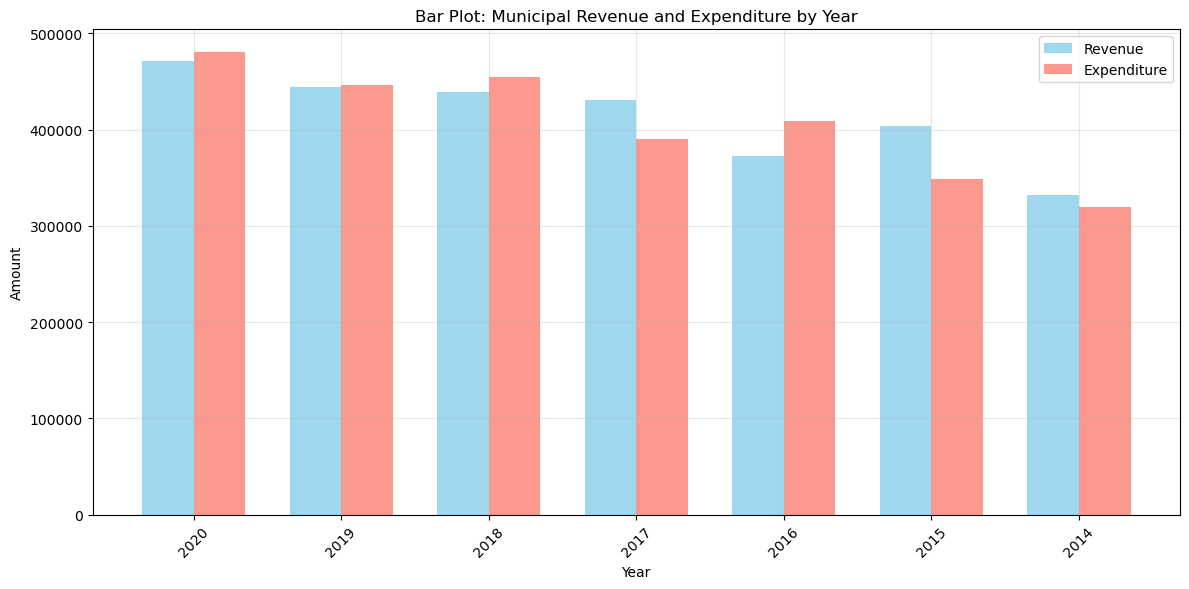

Bar plot saved as 'plots/bar_plot.png'


In [9]:
# 3. Bar Plot: Revenue and Expenditure by Year
plt.figure(figsize=(12, 6))

# Extract year numbers for x-axis
years = [year.split('-')[0] for year in df['Year']]
x_pos = range(len(years))

# Create bar plot
width = 0.35
plt.bar([x - width/2 for x in x_pos], df["Municipal's Revenue"], 
        width, label='Revenue', color='skyblue', alpha=0.8)
plt.bar([x + width/2 for x in x_pos], df["Municipal's Expenditure"], 
        width, label='Expenditure', color='salmon', alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Bar Plot: Municipal Revenue and Expenditure by Year')
plt.xticks(x_pos, years, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/bar_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Bar plot saved as 'plots/bar_plot.png'")

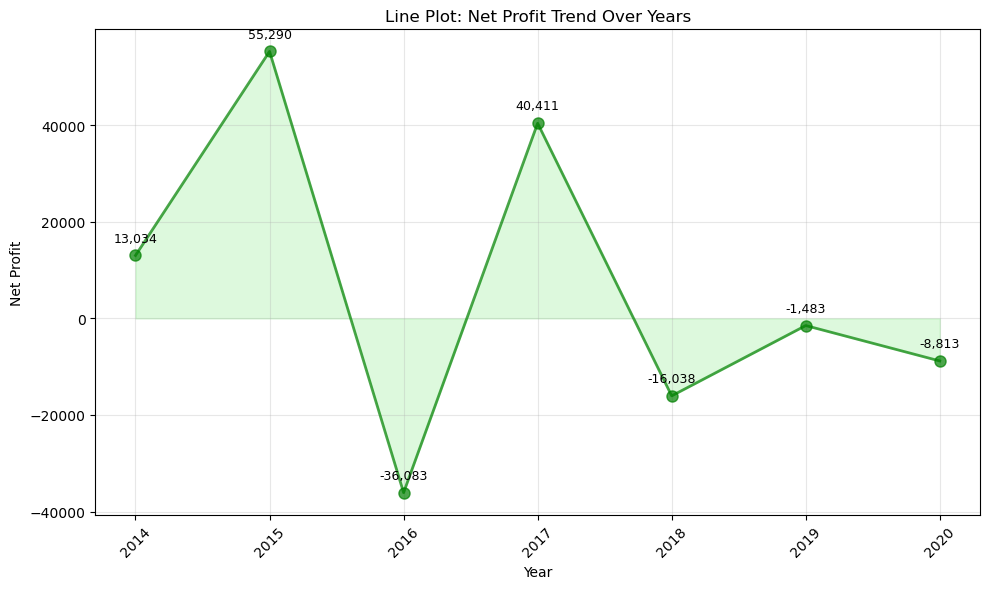

Line plot saved as 'plots/line_plot.png'


In [10]:
# 4. Line Plot: Trend of Net Profit Over Years
plt.figure(figsize=(10, 6))

# Sort data by year for better line plot visualization
df_sorted = df.sort_values('Year')
years_sorted = [year.split('-')[0] for year in df_sorted['Year']]

plt.plot(years_sorted, df_sorted['net_profit'], 
         marker='o', linewidth=2, markersize=8, color='green', alpha=0.7)
plt.fill_between(years_sorted, df_sorted['net_profit'], alpha=0.3, color='lightgreen')

plt.xlabel('Year')
plt.ylabel('Net Profit')
plt.title('Line Plot: Net Profit Trend Over Years')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels on points
for i, (year, profit) in enumerate(zip(years_sorted, df_sorted['net_profit'])):
    plt.annotate(f'{profit:,.0f}', 
                (year, profit), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('plots/line_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Line plot saved as 'plots/line_plot.png'")

In [11]:
# Summary: Check all created plots
import os
plot_files = os.listdir('plots')
print("Created plots:")
for plot in plot_files:
    print(f"  - {plot}")
    
print(f"\nTotal plots created: {len(plot_files)}")
print("All plots have been saved in the 'plots' directory with high resolution (300 DPI).")

Created plots:
  - scatter_plot.png
  - bar_plot.png
  - box_plot.png
  - line_plot.png

Total plots created: 4
All plots have been saved in the 'plots' directory with high resolution (300 DPI).
